# Esercitazione 4 - 11 Marzo 2025
 

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [2]:
import sys
import numpy as np
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [7]:
p=52 
t=53 
beta=2
spacing = beta**(p+1-t)
print(spacing)
x=2.0**52
y = x+spacing
print("X: ", x, "\ny: ", y)
z = x + 0.5 #Somma ad x (numero pari),  una quantità uguale alla metà dello spacing in 2**52,  z è un numero reale che si trova a metà
#tra due numeri di macchina successivi (2**52 e (2**52)+1 (essendo 1 lo spacing in questo intervallo dell'asse reale).
# Poichè x è pari, per la proprietà del rounding to even, z risulta uguale ad x)
print ("z: ", z)
q = y+0.5 #Somma ad y (numero dispari), una quantità uguale alla metà dello spacing in 2**52, per il rounding to even, essendo y dispari,
#z risulta uguale ad y+1
print("q: ", q)

1
X:  4503599627370496.0 
y:  4503599627370497.0
z:  4503599627370496.0
q:  4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [10]:
L=-1022
U = 1023
beta = 2.0
t = 53

cardinalità= 2*(beta-1)*beta**(t-1)*(U-L+1)+1
print("cardinalità: ",format(cardinalità))


cardinalità:  1.842872967520007e+19


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$.

In [14]:
p=0
t=53
f=2.0**p
spac= 2**(p+1-t)
print("Spacing in [1,2]: ", spac)
f1= f+spac
f2=f+spac/2
print("Valore di f ", f)
print("Valore successivo ad f, dato da f+s=",f1)
print("f+s/2=",f2)  #Ho sommato ad una quantità più piccola dello spacing in [1,2]


Spacing in [1,2]:  2.220446049250313e-16
Valore di f  1.0
Valore successivo ad f, dato da f+s= 1.0000000000000002
f+s/2= 1.0


- **4.** Siano $a=0.1234567890123400 e+16$, $b=-0.1234567890123401 e+16$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [23]:
a=0.1234567890123400e+16
b=-0.1234567890123401e+16
c=0.06
print("(a+b)+c: ", (a+b)+c)
print("(a+c)+b: ", (a+c)+b)
print("a+(b+c): ", a+(b+c))
print("Spacing: ", np.spacing(a))

(a+b)+c:  -0.94
(a+c)+b:  -1.0
a+(b+c):  -1.0
Spacing:  0.25


In [24]:
a1=0.23371258e-4
b1=0.33678429e+2
c1=-0.33677911e+2
print("(a+b)+c: ", (a1+b1)+c1)
print("(a+c)+b: ", (a1+c1)+b1)
print("a+(b+c): ", a1+(b1+c1))
print("Spacing: ", np.spacing(b))

(a+b)+c:  0.0005413712580022434
(a+c)+b:  0.0005413712580022434
a+(b+c):  0.0005413712579995743
Spacing:  -0.25


- **5** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [29]:
n=10
somma = 0.0
arr=np.ones((n,))*0.1
for i in range(10):
    somma = somma + arr[i]

print("somma con for: ", somma)
print("Somma con np: ", np.sum(arr))

somma con for:  0.9999999999999999
Somma con np:  1.0


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [3]:
import math 
import matplotlib.pyplot as plt
y1 = lambda x: np.sqrt(x**2 + 1)-x
y2= lambda x: 1/(np.sqrt(x**2 +1)+x)
x=7777.0;
print("x**2=", x**2, "x**2+1=",x**2+1, "sqrt(x^2+1)=2,",math.sqrt(x**2+1))
print("x=",x,"y1(x)=",y1(x),"y2(x)=",y2(x))
print("Spacing in x**2 = ",x**2," dato da ",np.spacing(x**2))
err=abs((y1(x)-y2(x))/y2(x))
print("errore relativo caso 1 ",err)
print("-----------------------------------------")
x=77777777.0;
print("x**2=", x**2, "x**2+1=",x**2+1, "sqrt(x^2+1)=2,",math.sqrt(x**2+1))
print("x=",x,"y1(x)=",y1(x),"y2(x)=",y2(x))
print("Spacing in x**2 = ",x**2," dato da ",np.spacing(x**2))
err=abs((y1(x)-y2(x))/y2(x))
print("errore relativo caso 2 ",err)
print("-----------------------------------------")

x**2= 60481729.0 x**2+1= 60481730.0 sqrt(x^2+1)=2, 7777.000064292143
x= 7777.0 y1(x)= 6.429214317904552e-05 y2(x)= 6.429214323431402e-05
Spacing in x**2 =  60481729.0  dato da  7.450580596923828e-09
errore relativo caso 1  8.59646147292077e-10
-----------------------------------------
x**2= 6049382595061729.0 x**2+1= 6049382595061730.0 sqrt(x^2+1)=2, 77777777.0
x= 77777777.0 y1(x)= 0.0 y2(x)= 6.428571492857143e-09
Spacing in x**2 =  6049382595061729.0  dato da  1.0
errore relativo caso 2  1.0
-----------------------------------------


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

x:  [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
Spacing:  [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863e-06 1.52587891e-05
 1.22070312e-04 1.95312500e-03 1.56250000e-02 1.25000000e-01
 2.00000000e+00 1.60000000e+01 1.28000000e+02 2.04800000e+03
 1.63840000e+04]
Errore relativo:  [0.00000000e+00 3.81639165e-16 8.21283146e-16 2.16209395e-14
 6.38647291e-14 6.25044601e-13 1.07548935e-10 9.28145750e-10
 1.03187712e-08 1.50211282e-07 6.14600376e-07 3.17244773e-08
 4.84358805e-05 9.06716545e-04 6.03525942e-03 1.39238685e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


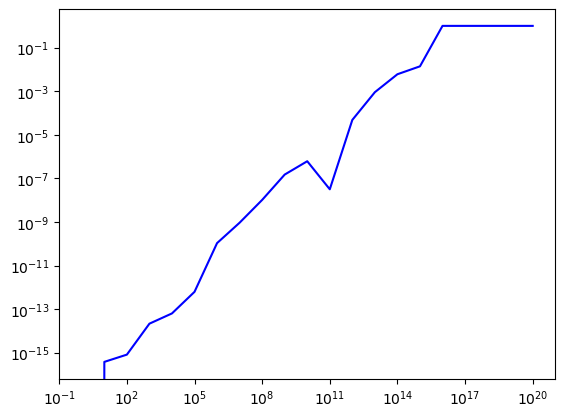

In [8]:
x=10.0**np.arange(21)
A= 1/x - 1/(x+1)
B= 1/(x*(x+1))
err_rell=np.abs(A-B)/np.abs(B)
print("x: ", x)
print("Spacing: ", np.spacing(x))
print("Errore relativo: ", err_rell)
plt.loglog(x, err_rell, 'b-')

- **8.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. Visualizzare: un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

Spacing in [1,2]  2.220446049250313e-16
Valori di 1/n  [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15 1.e-16]


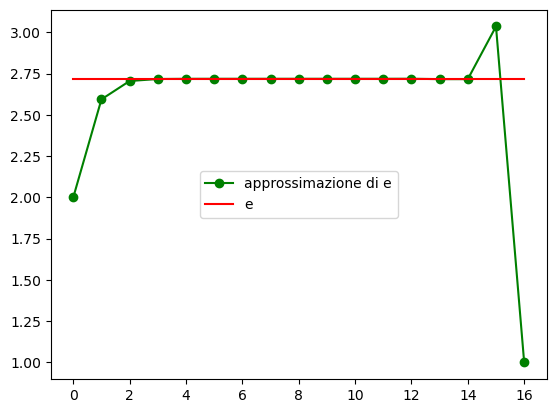

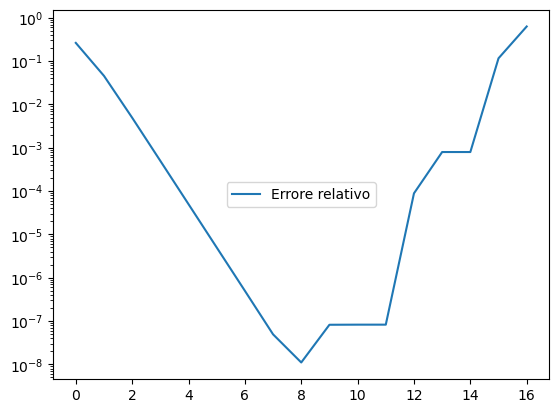

In [10]:
e=math.exp(1)
k=np.arange(17)
n=10**k
ef=(1+1/n)**n
err_rel= np.abs(e-ef)/e
print("Spacing in [1,2] ",np.spacing(1))
#Lo spacing in [1,2] è 2.e-16
print("Valori di 1/n ",1/n)
#Si nota che quando n=10**16, 1/n=1e-16  risulta più piccolo dello spacing in [1,2], per cui (1+1/n) 
# vale ad 1, ed il valore approssimato di "e" vale 1.
#L'errore relativo cala per valori di k1 da 0 a 8 e quindi di n da 10**0 fino a 10**8.
#Per  valori di n maggiori di 10**8,  nella formula (1+1/n) si cominciano a verificare gli errori 
#dovuti al fatto che si sommano valori di ordine di grandezza molto diversi, 1 ed 1/n molto piccolo al crescere di n. 
#Quando n=10**16, (1+1/n) vale 1 poichè 1/n è più piccolo dello spacing in [1,2] #e quindi il valore approssimato di "e" vale 1.

plt.plot(k ,ef,'go-',k,e*np.ones((17,1)),'r-')
plt.legend(['approssimazione di e','e'],loc='center')  #La proprietà loc, serve per specificare la posizione della legend
plt.show()

plt.plot(k,err_rel)
plt.yscale('log')
plt.legend(["Errore relativo"],loc='center')
plt.show()
